In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
start='2012-01-01'
end='2022-12-21'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981


In [4]:
avg_100_days=data.Close.rolling(100).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


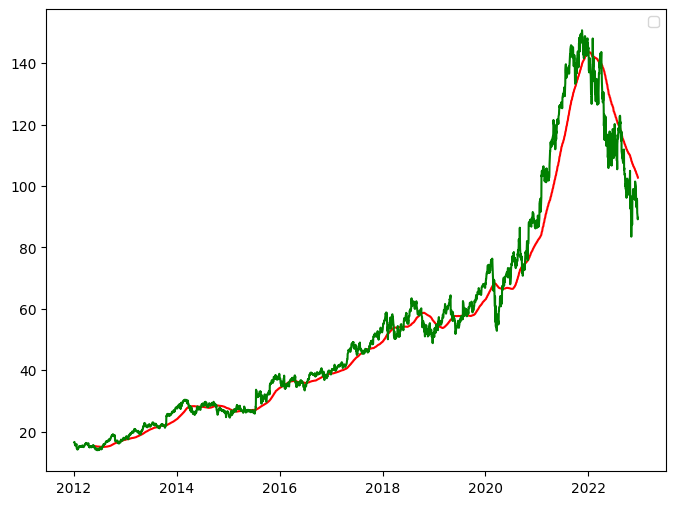

In [5]:
plt.figure(figsize=(8,6))
plt.plot(avg_100_days,'r')
plt.plot(data.Close,'g')
plt.legend()
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2761 entries, 2012-01-03 00:00:00+00:00 to 2022-12-20 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  2761 non-null   float64
 1   (Close, GOOG)      2761 non-null   float64
 2   (High, GOOG)       2761 non-null   float64
 3   (Low, GOOG)        2761 non-null   float64
 4   (Open, GOOG)       2761 non-null   float64
 5   (Volume, GOOG)     2761 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 151.0 KB


In [7]:
close_null_percentage=data['Close'].isnull().mean()*100
close_null_percentage

Ticker
GOOG    0.0
dtype: float64

In [8]:
train_set=pd.DataFrame(data.Close.iloc[0:int(len(data)*0.80)])
test_set=pd.DataFrame(data.Close.iloc[int(len(data)*0.80):len(data)])

In [9]:
train_set.shape[0]

2208

In [10]:
test_set.shape[0]


553

In [11]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [12]:
scaler=MinMaxScaler()
train_scaled=scaler.fit_transform(train_set)
test_scaled=scaler.fit_transform(test_set)

In [13]:
x = []
y = []
for i in range(100,train_scaled.shape[0]):
  x.append(train_scaled[i-100:i])
  y.append(train_scaled[i])

In [14]:
x,y=np.array(x),np.array(y)

In [24]:


class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_sizes=[50, 60, 80, 120], dropout_rates=[0.2, 0.3, 0.4,0.5]):
        super(LSTMModel, self).__init__()
        
       
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_layer_sizes[0], batch_first=True)
        self.dropout1 = nn.Dropout(dropout_rates[0])
        
        self.lstm2 = nn.LSTM(input_size=hidden_layer_sizes[0], hidden_size=hidden_layer_sizes[1], batch_first=True)
        self.dropout2 = nn.Dropout(dropout_rates[1])
        
        self.lstm3 = nn.LSTM(input_size=hidden_layer_sizes[1], hidden_size=hidden_layer_sizes[2], batch_first=True)
        self.dropout3 = nn.Dropout(dropout_rates[2])
        
        self.lstm4 = nn.LSTM(input_size=hidden_layer_sizes[2], hidden_size=hidden_layer_sizes[3], batch_first=True)
        self.dropout4 = nn.Dropout(dropout_rates[3])
       
        self.fc = nn.Linear(120, 1)
        
    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        
        x, _ = self.lstm3(x)
        x = self.dropout3(x)
        
        x, _ = self.lstm4(x)
        
    
        x = self.fc(x[:, -1, :]) 
        return x


model = LSTMModel()


print(model)


LSTMModel(
  (lstm1): LSTM(1, 50, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(50, 60, batch_first=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (lstm3): LSTM(60, 80, batch_first=True)
  (dropout3): Dropout(p=0.4, inplace=False)
  (lstm4): LSTM(80, 120, batch_first=True)
  (dropout4): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=120, out_features=1, bias=True)
)


In [ ]:
#pytorch

In [25]:



x_train_tensor = torch.FloatTensor(x)
y_train_tensor = torch.FloatTensor(y).view(-1, 1)  


In [ ]:
#loss function 

In [29]:

from  torch.utils.data import DataLoader, TensorDataset

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())
x_train_tensor = x_train_tensor.view(x_train_tensor.size(0), x_train_tensor.size(1), 1)


dataset = TensorDataset(x_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

num_epochs = 50
for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
      
        optimizer.zero_grad()

       
        outputs = model(batch_x)

      
        loss = criterion(outputs, batch_y.view(-1, 1))  

      
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 0.0019
Epoch [2/50], Loss: 0.0008
Epoch [3/50], Loss: 0.0006
Epoch [4/50], Loss: 0.0021
Epoch [5/50], Loss: 0.0024
Epoch [6/50], Loss: 0.0008
Epoch [7/50], Loss: 0.0021
Epoch [8/50], Loss: 0.0009
Epoch [9/50], Loss: 0.0011
Epoch [10/50], Loss: 0.0005
Epoch [11/50], Loss: 0.0008
Epoch [12/50], Loss: 0.0013
Epoch [13/50], Loss: 0.0003
Epoch [14/50], Loss: 0.0008
Epoch [15/50], Loss: 0.0009
Epoch [16/50], Loss: 0.0005
Epoch [17/50], Loss: 0.0005
Epoch [18/50], Loss: 0.0006
Epoch [19/50], Loss: 0.0005
Epoch [20/50], Loss: 0.0015
Epoch [21/50], Loss: 0.0004
Epoch [22/50], Loss: 0.0007
Epoch [23/50], Loss: 0.0006
Epoch [24/50], Loss: 0.0004
Epoch [25/50], Loss: 0.0004
Epoch [26/50], Loss: 0.0005
Epoch [27/50], Loss: 0.0005
Epoch [28/50], Loss: 0.0004
Epoch [29/50], Loss: 0.0005
Epoch [30/50], Loss: 0.0007
Epoch [31/50], Loss: 0.0009
Epoch [32/50], Loss: 0.0008
Epoch [33/50], Loss: 0.0008
Epoch [34/50], Loss: 0.0008
Epoch [35/50], Loss: 0.0008
Epoch [36/50], Loss: 0.0009
E

In [30]:
past_100_days = train_set.tail(100)
test_set = pd.concat([past_100_days,test_set], ignore_index = True)

In [31]:
test_scale = scaler.fit_transform(test_set)


x_test = []
y_test = []
for i in range(100, test_scale.shape[0]):
  x_test.append(test_scale[i-100:i])
  y_test.append(test_scale[i])

x_test, y_test = np.array(x_test), np.array(y_test)

In [32]:
x_test_tensor = torch.tensor(x_test, dtype= torch.float32)


model.eval()


with torch.no_grad():
  predictions = model(x_test_tensor)


predictions_np = predictions.numpy()

In [33]:
predictions_np_unscaled = scaler.inverse_transform(predictions_np)
actual_price = scaler.inverse_transform(y_test)

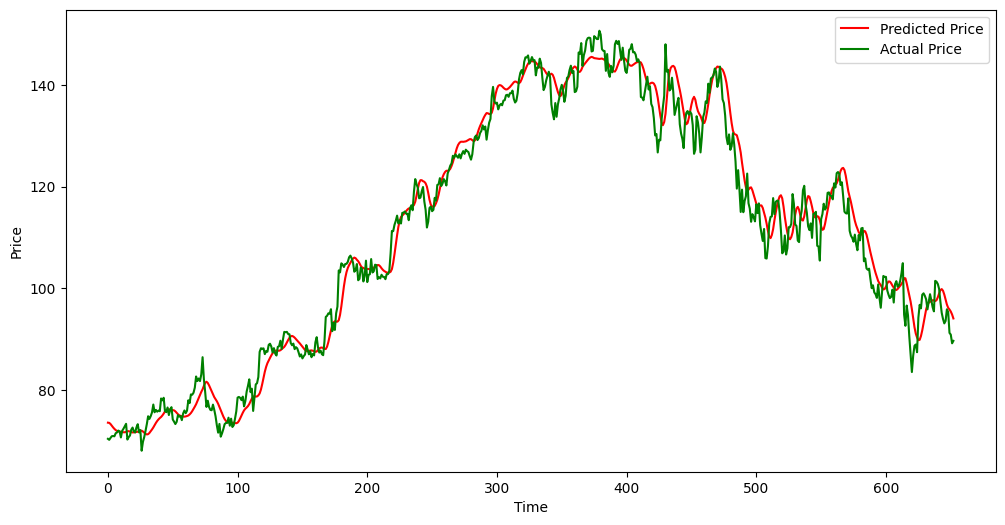

In [34]:
plt.figure(figsize = (12,6))
plt.plot(predictions_np_unscaled, 'r', label = 'Predicted Price')
plt.plot(actual_price, 'g', label = 'Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()